# 1. Frame the problem and look at the big picture

It is your job to predict the sales price for each house. 
For each Id in the test set, you must predict the value of the SalePrice variable. 

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

##### Look at the big picture
Predict the sales price of the test-test. Get the lowest RootMeanSquaredError possible. 
79 Explanatory variables. 1450 observations in training dataset

##### What type of problem:
Includes labels: (data includes the desired solutions)
Typical regression task: we want to predict a value. Multiple regression as we will use multiple features
Univariate regression: Only trying to predict one value per house
No continuous flow of data into the system
No need to adjust or change data rapidly. 
Data is small enough to fit in memory. Plain batch learning

# 2. Get the data 

In [1]:

import os
import pandas as pd
import numpy as np

In [2]:
HOUSING_PATH = #"File location"


In [3]:
def load_training_data(housing_path=HOUSING_PATH):
    csv_path =os.path.join(housing_path, "train.csv")
    
def load_test_data(housing_path=HOUSING_PATH):
    csv_path =os.path.join(housing_path, "test.csv")
    return pd.read_csv(csv_path)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

IMAGES_PATH = HOUSING_PATH
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
### Take a look at the data structure

#Let's check the first rows
housing = load_training_data()
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housing['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

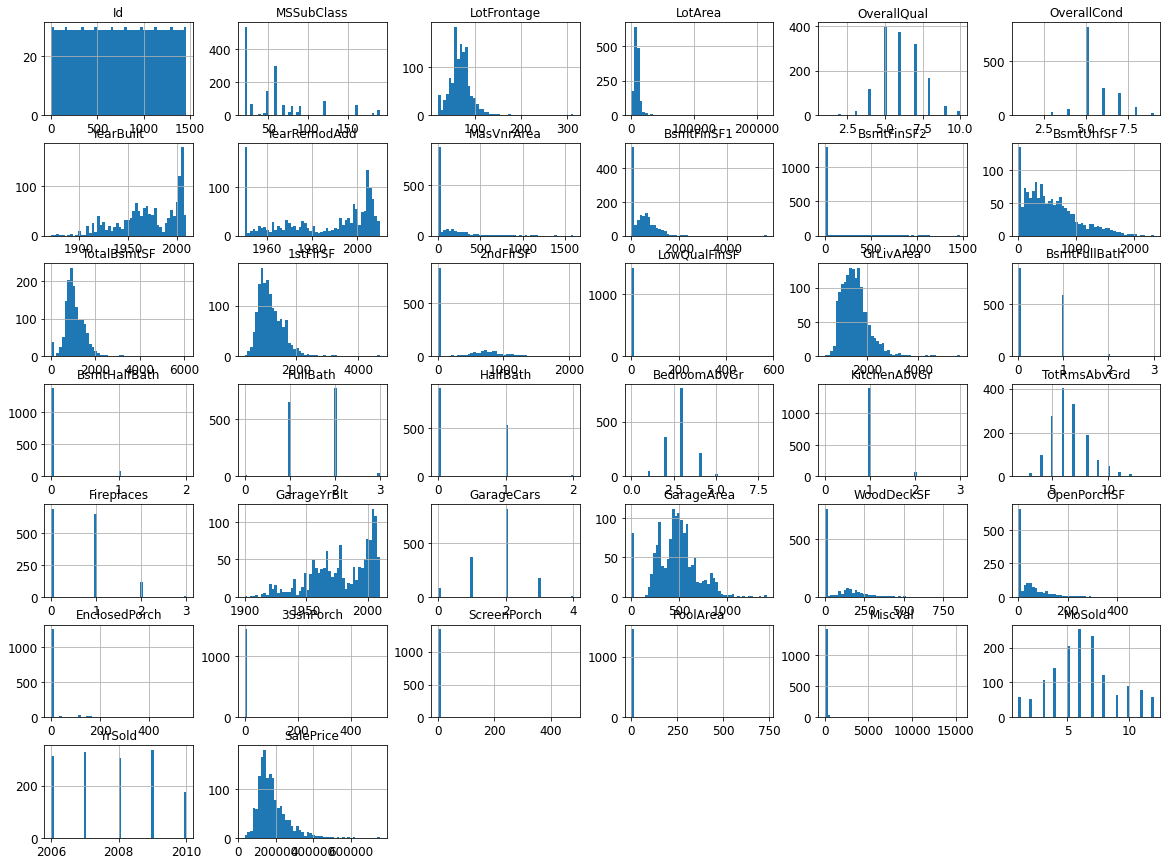

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show

<AxesSubplot:>

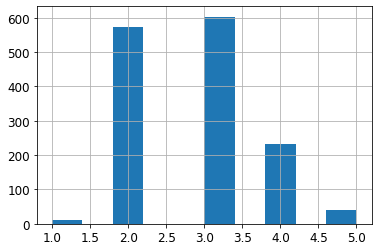

In [7]:
#Let's say I would test the distribution of the number of square meters
#First I make a category collom, on the total dataset

#Stel dat ik wil testen of het aantal vierkante meters ongeveer gelijk loopt
#Eerst maak ik een categorie-kolom, op totale dataset
housing['1stFlrSF_cat'] = pd.cut(housing["1stFlrSF"],
                                bins=[0., 500, 1000, 1500, 2000, 5000, np.inf],
                                labels = [1, 2, 3, 4, 5, 6])
housing['1stFlrSF_cat'].hist()
#After a trial and error, to correct for the long tail; I used a 3000 feet last category instead of 500

In [13]:
#Create a test set. Using the ID in each row to decide test and train set
#Making an hash out of those IDs

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [14]:
import numpy as np
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

#Can also be done with sk train_test_split() function

In [15]:
train_set, test_set = split_train_test_by_id(housing, 0.2, 'Id')

In [16]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,1stFlrSF_cat
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,2
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,4


In [17]:
len(train_set)

1169

In [18]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,1stFlrSF_cat
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,345000,3
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000,2
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,230000,4


In [19]:
len(test_set)

291

In [20]:
housing['1stFlrSF_cat'].value_counts()/len(housing['1stFlrSF_cat'])

3    0.413014
2    0.391781
4    0.159589
5    0.027397
1    0.008219
6    0.000000
Name: 1stFlrSF_cat, dtype: float64

In [21]:
train_set['1stFlrSF_cat'].value_counts()/len(housing['1stFlrSF_cat'])

3    0.336301
2    0.315068
4    0.118493
5    0.023288
1    0.007534
6    0.000000
Name: 1stFlrSF_cat, dtype: float64

In [22]:
#Let's to stratified sampling in order to make sure that the test and train set have similar representation 
#    on 1st floor square foot

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["1stFlrSF_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [9]:
strat_train_set["1stFlrSF_cat"].value_counts()/len(housing['1stFlrSF_cat'])
#As you can see below, the square feet category is represented more accurately than in the initial training set 
## (although its was not too far off in the first place)

#Same result because of random state = fixed

3    0.330137
2    0.313699
4    0.127397
5    0.021918
1    0.006849
6    0.000000
Name: 1stFlrSF_cat, dtype: float64

Above same resul if run again because of markdown

In [10]:
#Now remove the ["1stFlrSF_cat"] to get the data back at its original state

In [11]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("1stFlrSF_cat", axis=1, inplace=True)


In [27]:
#strat_train_set.columns

In [28]:
### done for 2. Get the data

# 3. Explore the data to gain insights

In [29]:
corr_matrix = housing.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [30]:
corr_matrix["SalePrice"].sort_values(ascending=True)[:10]

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', yla

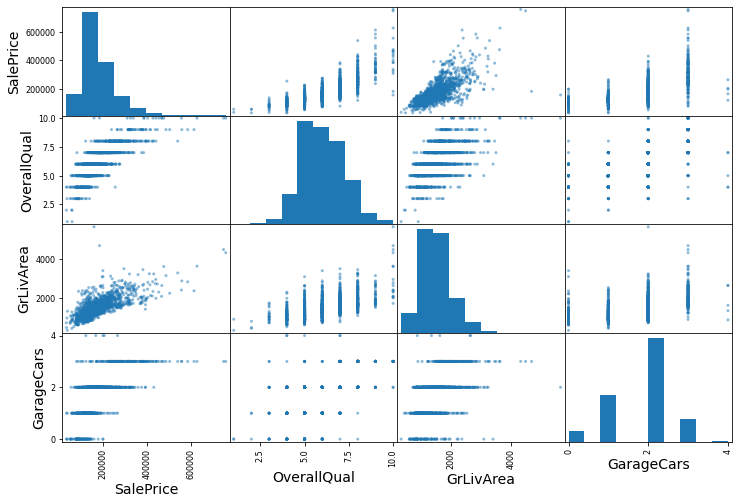

In [31]:
#Plot corelations between most promising attributes

from pandas.plotting import scatter_matrix

attributes = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
scatter_matrix(housing[attributes], figsize=(12,8))

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>]],
      dtype=object)

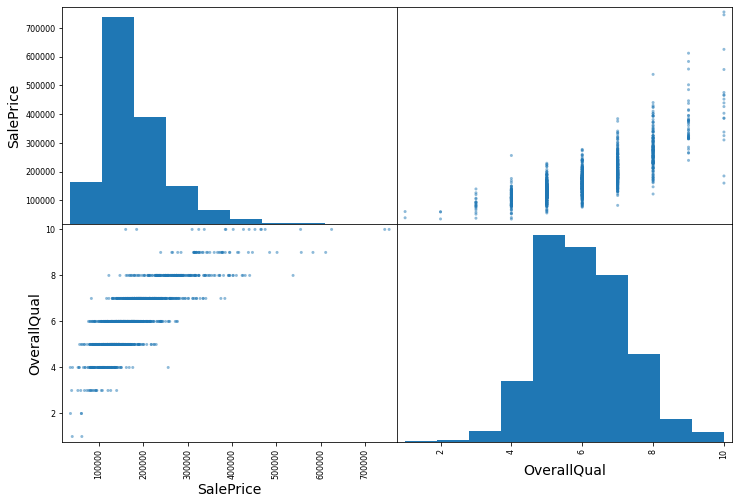

In [32]:
attributes =["SalePrice", 'OverallQual']
scatter_matrix(housing[attributes], figsize=(12,8))

# 4. Prepare the data to better expose underlying data patterns to Machine Learning algorithms

### Preparing the data for machine learning algorithms

In [33]:
#Writing functions to transform the data

# Let's start with writing functions to take care of missing features

In [12]:
#Creating a copy of the training set and storing the labels seperately
housing = strat_train_set.drop("SalePrice", axis=1)
housing_labels = strat_train_set["SalePrice"].copy()

In [13]:
#Get rid of the row
#Get rid of the attribute
#Set values to zero
median = housing["LotFrontage"].median()
housing["LotFrontage"].fillna(median, inplace=True)

In [36]:
housing.info()
#LotFrontage has been filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 646 to 721
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          78 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overall

In [14]:
#Now let's use SciKit's simple Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="constant", fill_value=0)

In [15]:
#This imputer can only be applied on numerical values, therefore we create a copy of the data without text attributes

In [16]:
housing_num = housing.select_dtypes(include=['int64','float64'])
housing_num.info()

#It worked (not from the textbook)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 646 to 721
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   OverallQual    1168 non-null   int64  
 5   OverallCond    1168 non-null   int64  
 6   YearBuilt      1168 non-null   int64  
 7   YearRemodAdd   1168 non-null   int64  
 8   MasVnrArea     1162 non-null   float64
 9   BsmtFinSF1     1168 non-null   int64  
 10  BsmtFinSF2     1168 non-null   int64  
 11  BsmtUnfSF      1168 non-null   int64  
 12  TotalBsmtSF    1168 non-null   int64  
 13  1stFlrSF       1168 non-null   int64  
 14  2ndFlrSF       1168 non-null   int64  
 15  LowQualFinSF   1168 non-null   int64  
 16  GrLivArea      1168 non-null   int64  
 17  BsmtFullBath   1168 non-null   int64  
 18  BsmtHal

In [17]:
imputer.fit(housing_num)

SimpleImputer(fill_value=0, strategy='constant')

In [18]:
imputer.statistics_
#This example is not so interesting as I only put in 0's if missing

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [19]:
#Creating an array with the transformed features
X = imputer.transform(housing_num)

#putting it back in a datafram
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index= housing_num.index)

In [20]:
#Now you can see it's all filled
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 646 to 721
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   float64
 1   MSSubClass     1168 non-null   float64
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   float64
 4   OverallQual    1168 non-null   float64
 5   OverallCond    1168 non-null   float64
 6   YearBuilt      1168 non-null   float64
 7   YearRemodAdd   1168 non-null   float64
 8   MasVnrArea     1168 non-null   float64
 9   BsmtFinSF1     1168 non-null   float64
 10  BsmtFinSF2     1168 non-null   float64
 11  BsmtUnfSF      1168 non-null   float64
 12  TotalBsmtSF    1168 non-null   float64
 13  1stFlrSF       1168 non-null   float64
 14  2ndFlrSF       1168 non-null   float64
 15  LowQualFinSF   1168 non-null   float64
 16  GrLivArea      1168 non-null   float64
 17  BsmtFullBath   1168 non-null   float64
 18  BsmtHal

### handling text and categorical attributes

In [21]:
housing_cat = housing.select_dtypes(include=['object'])
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 646 to 721
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Street         1168 non-null   object
 2   Alley          78 non-null     object
 3   LotShape       1168 non-null   object
 4   LandContour    1168 non-null   object
 5   Utilities      1168 non-null   object
 6   LotConfig      1168 non-null   object
 7   LandSlope      1168 non-null   object
 8   Neighborhood   1168 non-null   object
 9   Condition1     1168 non-null   object
 10  Condition2     1168 non-null   object
 11  BldgType       1168 non-null   object
 12  HouseStyle     1168 non-null   object
 13  RoofStyle      1168 non-null   object
 14  RoofMatl       1168 non-null   object
 15  Exterior1st    1168 non-null   object
 16  Exterior2nd    1168 non-null   object
 17  MasVnrType     1162 non-null   object
 18  ExterQual      1168 non-nul

### Not all values have been filled. Can I add in ' Not applicable'  instead of NaN?

#### below is not like in the book

In [22]:
imputer = SimpleImputer(strategy="constant", fill_value='Not applicable')
imputer.fit(housing_cat)

SimpleImputer(fill_value='Not applicable', strategy='constant')

In [23]:
imputer.statistics_[:2]

array(['Not applicable', 'Not applicable'], dtype=object)

In [24]:
#Creating an array with the transformed features
X = imputer.transform(housing_cat)

#putting it back in a datafram
housing_tr_cat = pd.DataFrame(X, columns=housing_cat.columns,
                         index= housing_cat.index)

In [25]:
housing_tr_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 646 to 721
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Street         1168 non-null   object
 2   Alley          1168 non-null   object
 3   LotShape       1168 non-null   object
 4   LandContour    1168 non-null   object
 5   Utilities      1168 non-null   object
 6   LotConfig      1168 non-null   object
 7   LandSlope      1168 non-null   object
 8   Neighborhood   1168 non-null   object
 9   Condition1     1168 non-null   object
 10  Condition2     1168 non-null   object
 11  BldgType       1168 non-null   object
 12  HouseStyle     1168 non-null   object
 13  RoofStyle      1168 non-null   object
 14  RoofMatl       1168 non-null   object
 15  Exterior1st    1168 non-null   object
 16  Exterior2nd    1168 non-null   object
 17  MasVnrType     1168 non-null   object
 18  ExterQual      1168 non-nul

In [26]:
#Some of the above, such as GarageQual (Ex, Gd, TA, etc.) are judgement scales, just like OverallQual(0 - 10)
#Could transform them to numbers and then see how they would score on corelation 
#ML algorithms prefer working with numbers, so let's convert

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_tr_cat)
housing_cat_encoded[:2]

array([[ 3.,  1.,  1.,  3.,  3.,  0.,  4.,  0., 12.,  2.,  2.,  0.,  2.,
         3.,  0.,  8.,  8.,  2.,  3.,  4.,  1.,  3.,  2.,  4.,  4.,  4.,
         0.,  2.,  1.,  5.,  3.,  2.,  3.,  5.,  3.,  5.,  5.,  2.,  3.,
         4.,  1.,  8.,  4.],
       [ 3.,  1.,  1.,  3.,  3.,  0.,  4.,  0., 12.,  2.,  2.,  2.,  2.,
         1.,  0., 11., 12.,  1.,  3.,  4.,  3.,  3.,  2.,  4.,  4.,  4.,
         4.,  1.,  0.,  0.,  3.,  6.,  3.,  5.,  3.,  5.,  5.,  2.,  3.,
         4.,  1.,  8.,  4.]])

In [72]:
#the encoders for each of the arays
ordinal_encoder.categories_[:10]

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Not applicable', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object)]

In [29]:
#Issue with this representation is that ML algorithm will assume that two nearby values are more similar than two distant values
#In this data, this is not always correct.
#Solution is to create one binary attribute per category: one hot encoding. The new attributes would be dummy variables

In [74]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown = 'ignore') 
                            #handle_unknown: if any categories appear in test set which were not in training set
                            
housing_cat_1hot = cat_encoder.fit_transform(housing_tr_cat)
housing_cat_1hot
#Output is a sparse matrix, only remembering where there are 1's to save memory

<1168x263 sparse matrix of type '<class 'numpy.float64'>'
	with 50224 stored elements in Compressed Sparse Row format>

#### Custom transformers, I skip for now

#### Feature scaling

In [31]:
### You can use min - max (all between 0 and 1) or Standardisation (substracts mean value and divides by stand. dev.)
### We use Standardisation
### Pipeline for numerical values

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value=0)),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
housing_num_tr

array([[-0.19313344, -0.85564765, -0.48132633, ..., -0.08116821,
         0.24238915,  0.14548979],
       [-0.90869207,  0.81458637,  0.01281901, ..., -0.08116821,
        -0.50165955, -1.36501757],
       [-0.61681947, -0.85564765,  0.75403703, ..., -0.08116821,
        -0.8736839 , -0.60976389],
       ...,
       [ 1.55104073, -0.13983307, -0.48132633, ..., -0.08116821,
         0.6144135 , -0.60976389],
       [-0.0589662 ,  3.20063495,  0.30930622, ..., -0.08116821,
        -0.50165955,  1.65599715],
       [-0.01659759,  1.53040094,  0.01281901, ..., -0.08116821,
        -0.50165955,  1.65599715]])

In [77]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ### Could still, later, add in a drop line
    ("cat", OneHotEncoder (handle_unknown='ignore'), cat_attribs)
])#Also here, with the OneHotEncoder, adding the handle_unknown='ignore'

housing_prepared = full_pipeline.fit_transform(housing)

In [34]:
housing_prepared

#Sparse matrix if ratio of nonzero cells is below 0.3

<1168x300 sparse matrix of type '<class 'numpy.float64'>'
	with 93440 stored elements in Compressed Sparse Row format>

# 5. Explore many different models and shortlist the best ones

#### Select and train a model

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Predictions:", lin_reg.predict(some_data_prepared))

In [68]:
print("Labels:", list(some_labels))5
#Not bad, but in some instances a bit off (second case ~8%)

Labels: [98300, 87500, 167000, 256300, 201800]


In [69]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
#So typically the sales price predicted by the linear regression model is 20.000 off. 
#Half of districts are between 130 k and 214 k, so 20 k error is a bit far 

20472.232542558206

In [70]:
#Let's try decision tree, probably overfitting at first
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [71]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Better evaluation using Cross-validation

In [74]:
### cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [75]:
def display_scores (scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [76]:
display_scores(tree_rmse_scores)
#So performance is worse; 41 k off on average, while it was 20 k off before

Scores: [55239.66220514 44078.44559952 44777.9058407  45074.05603811
 39579.31527105 35905.6126583  40748.08834455 34237.84378657
 35852.76891666 38326.55599199]
Mean: 41382.02546525834
Standard deviation: 5908.117398294058


In [77]:
### let's cross validate the Linear Regression model

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 49792.31643272  52411.14682372  23332.65994796  27856.34548207
 362676.04088652  32759.40323268  19169.8449934   20159.47460704
  36330.80256608  27231.51763585]
Mean: 65171.95526080315
Standard deviation: 99757.31243395033


In [ ]:
#So it seems there was overfitting by the Linear Regression too. 
#In fact, we now know that the linear Regression may hold up worse than the overfitting decision tree model

In [ ]:
### Random forest: Works by training many decision trees on random subsets of features, than averaging out predictions

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [ ]:
forest_reg.fit(housing_prepared, housing_labels)

In [79]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

#12 k, that's better score on the training set than linear regression, worse than decision tree

12090.589930468399

In [81]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

#30 k mean rmse, this is the best score so far. 
#score on the validation set

Scores: [46975.66599391 31807.26869677 25546.85033663 33471.01857253
 28982.01784317 25795.19180835 24898.01541685 26493.78954801
 37361.11625833 25214.23504273]
Mean: 30654.5169517292
Standard deviation: 6731.746284203176


##### let's try to save models

In [82]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 99427.96488863,  94777.63361953, 186646.65947234, 262805.53908503,
       218798.31159999])

In [83]:
linear_model = full_pipeline_with_predictor

In [84]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("tree", DecisionTreeRegressor())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 98300.,  87500., 167000., 256300., 201800.])

In [85]:
dec_tree_model = full_pipeline_with_predictor

In [86]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", RandomForestRegressor())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([104537.  ,  89136.11, 168661.5 , 255399.59, 205543.1 ])

In [87]:
rand_for_model = full_pipeline_with_predictor

In [88]:
import joblib
#joblib.dump(my_model, "my_model.pkl")
joblib.dump(linear_model, "lin_model.pkl")
joblib.dump(dec_tree_model, "tree_model.pkl")
joblib.dump(rand_for_model, "rf_model.pkl")


# DIFF
#...
#lin_model_loaded = joblib.load("lin_model.pkl") # DIFF

['rf_model.pkl']

### Models were created some time ago. Now I reload the models 

In [38]:
import joblib
lin_model_loaded = joblib.load("lin_model.pkl")
dec_tree_loaded = joblib.load("tree_model.pkl")
rand_for_loaded = joblib.load("rf_model.pkl")

In [42]:
#Let's test if the loaded data works
rand_for_loaded.predict(some_data)

array([104537.  ,  89136.11, 168661.5 , 255399.59, 205543.1 ])

#### So when reloading, _loaded models in above behave as if they were _model (the full_pipeline_with_predictor)

# 6. Fine-tune your models and combine them into a great solution

##### Ok, three models. Let's look at ways to finetune them

## Grid search

##### Trying out hyperparameters automatically  

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor #This one had to be added

param_grid = [
    #try 6 (2x3) combinations of the hyperparameters
    {'n_estimators': [10, 100], 'max_features': [2, 6, 12]},
    #then try 4 (2x2) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators' : [3,10], 'max_features':[2, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
#train across 5 folds, that's a total of (6+4)*5 = 50 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 6, 12],
                          'n_estimators': [10, 100]},
                         {'bootstrap': [False], 'max_features': [2, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 100}

In [49]:
### The best score is with the max, so trying out more
# did not take as long to load as I feared

In [48]:
param_grid = [
    #try 6 (2x3) combinations of the hyperparameters
    {'n_estimators': [100, 1000], 'max_features': [12, 20, 50]},
    #then try 4 (2x2) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators' : [3,10], 'max_features':[2, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
#train across 5 folds, that's a total of (6+4)*5 = 50 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [12, 20, 50],
                          'n_estimators': [100, 1000]},
                         {'bootstrap': [False], 'max_features': [2, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
#Above one took longer

grid_search.best_params_
#This one now takes long as well

{'max_features': 50, 'n_estimators': 1000}

In [52]:
grid_search.best_estimator_

RandomForestRegressor(max_features=50, n_estimators=1000, random_state=42)

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

32776.12152182023 {'max_features': 12, 'n_estimators': 100}
32440.441217744014 {'max_features': 12, 'n_estimators': 1000}
31485.692470624992 {'max_features': 20, 'n_estimators': 100}
31439.57620252732 {'max_features': 20, 'n_estimators': 1000}
30366.58388625145 {'max_features': 50, 'n_estimators': 100}
30208.780101809152 {'max_features': 50, 'n_estimators': 1000}
46603.75633715282 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
39585.57451312437 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
45959.99398631797 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
38662.9746611697 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [55]:
# so max_features: 50 + n_estimators: 100, but especially 1000 perform slightly
#better then the default (30.654 original vs.30.366 & 30.208)
#so the best model is now finetuned

## Randomized Search

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=20), #Below I noted that top 15 features are relevant.
    } #Therefore, I am trying out the max_features high with 20 instead of 8

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
    

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000225DF7F2740>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000225DF7F2A40>},
                   random_state=42, scoring='neg_mean_squared_error')

In [65]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

34676.93834054847 {'max_features': 7, 'n_estimators': 180}
32587.554366474076 {'max_features': 15, 'n_estimators': 107}
33934.44091663454 {'max_features': 8, 'n_estimators': 189}
35078.72778172765 {'max_features': 7, 'n_estimators': 122}
31843.373864154066 {'max_features': 19, 'n_estimators': 75}
33359.06643816351 {'max_features': 11, 'n_estimators': 88}
36413.39114928409 {'max_features': 4, 'n_estimators': 104}
37558.09174570462 {'max_features': 3, 'n_estimators': 150}
38344.46970192017 {'max_features': 2, 'n_estimators': 88}
32631.64647070945 {'max_features': 12, 'n_estimators': 158}


In [69]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=19, n_estimators=75, random_state=42)

In [67]:
#None of above is performing better than the GridSearch result or even the default
#19 features comes closest with 31,8 K

## Analyze the best models and their errors

In [62]:
#First compute feature importance
#Randomforest provides indication relative importance
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.23017263e-03, 2.97692092e-03, 8.52291179e-03, 1.85649007e-02,
       1.58853114e-01, 3.91837454e-03, 3.61961629e-02, 1.32254805e-02,
       1.08744297e-02, 2.54277199e-02, 7.57758358e-04, 5.67954847e-03,
       6.47984022e-02, 5.02928902e-02, 2.68890063e-02, 2.46545640e-04,
       9.79451181e-02, 2.02805347e-03, 6.64394945e-04, 2.28568974e-02,
       2.46618434e-03, 3.94604510e-03, 8.36893904e-04, 1.82116139e-02,
       9.10646569e-03, 2.21257823e-02, 7.93395117e-02, 5.68522212e-02,
       4.30187912e-03, 6.60671102e-03, 8.65513598e-04, 2.07842885e-04,
       1.26042312e-03, 9.31688870e-04, 1.46631384e-04, 3.98375464e-03,
       1.76319682e-03, 5.50828208e-05, 1.32732791e-04, 3.67362312e-05,
       1.17827555e-03, 1.49173716e-03, 2.41988654e-05, 1.40181978e-05,
       1.77436848e-04, 1.33534432e-04, 3.14216268e-04, 7.52818545e-04,
       5.10791084e-04, 1.96616992e-04, 9.62600665e-04, 6.48540215e-04,
       6.43916063e-04, 4.70442901e-04, 9.34669840e-04, 2.77394270e-06,
      

In [76]:
#The attributes created
#extra_attribs = ["NAME OF EXTRA ATTRIBUTE"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution

#categories converted to numbers
cat_encoder = full_pipeline.named_transformers_["cat"]

#Grading scales we converted to one hot encoding
cat_one_hot_attribs = list(cat_encoder.categories_[0])

#all those attributes together
attributes = num_attribs  + cat_one_hot_attribs #+ extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1588531138516039, 'OverallQual'),
 (0.09794511808017298, 'GrLivArea'),
 (0.07933951168742413, 'GarageCars'),
 (0.06479840224019064, 'TotalBsmtSF'),
 (0.05685222120298386, 'GarageArea'),
 (0.05029289021978306, '1stFlrSF'),
 (0.03619616292968438, 'YearBuilt'),
 (0.026889006301409127, '2ndFlrSF'),
 (0.025427719866834068, 'BsmtFinSF1'),
 (0.02285689736687939, 'FullBath'),
 (0.022125782315279074, 'GarageYrBlt'),
 (0.018564900683158105, 'LotArea'),
 (0.018211613891120196, 'TotRmsAbvGrd'),
 (0.01322548047234262, 'YearRemodAdd'),
 (0.010874429735247257, 'MasVnrArea'),
 (0.009106465693842089, 'Fireplaces'),
 (0.008522911790377407, 'LotFrontage'),
 (0.006606711023794759, 'OpenPorchSF'),
 (0.005679548474727195, 'BsmtUnfSF'),
 (0.004301879117465606, 'WoodDeckSF'),
 (0.004230172634298786, 'Id'),
 (0.003983754638119172, 'MoSold'),
 (0.003946045103393035, 'BedroomAbvGr'),
 (0.003918374536650959, 'OverallCond'),
 (0.002976920919358093, 'MSSubClass'),
 (0.0024661843382304278, 'HalfBath'),
 (0.00202

In [68]:
#So I could already drop 27 variables (all below Fireplace). 
#Only top 15 variables influence by at leaast 1% 

#As a next step, I increased the max_features on the RandomSearch. 
#Yet, no clear improvement 

## Evaluate your system on the test set

In [79]:
from sklearn.metrics import mean_squared_error #did not import this one before

final_model = grid_search.best_estimator_ #Better than randomsearch or default

X_test = strat_test_set.drop("SalePrice", axis=1)
y_test = strat_test_set["SalePrice"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
#The first time I run this, I find unknown categories in the strat_test_set.
#Therefore pipeline can not be completed
# Solution was in the OneHotEncoder error handling

In [80]:
final_rmse

25992.4417982325

In [81]:
#Good job! Even better than with the GridSearch and default Cross-Validation

In [83]:
#95% confidence interval for the RMSE

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([12554.10830948, 34548.63855238])

# 7. Present your solution

In [ ]:
#Ok, now I have to look in Kaggle on how to submit:

#Load the test set and run the same stuff on that

In [87]:
housing_sub = load_test_data()
housing_sub.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [86]:
#So loading was successfull. Now I have to run the model and create 1 columns with 'Id' and one with 'SalePrice' 

In [88]:
final_model = grid_search.best_estimator_ #Better than randomsearch or 

X_submission = full_pipeline.transform(housing_sub)
final_predictions_sub = final_model.predict(X_submission)

In [ ]:
X_test = strat_test_set.drop("SalePrice", axis=1)
y_test = strat_test_set["SalePrice"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [89]:
final_predictions_sub[:3]

array([126601.986, 152024.845, 185025.136])

In [92]:
ID_sub = housing_sub['Id']
ID_sub[:3]

0    1461
1    1462
2    1463
Name: Id, dtype: int64

In [96]:
import pandas as pd

df = pd.DataFrame()
df['Id'] = ID_sub
df['SalePrice']=final_predictions_sub
df[:3]


,Id,SalePrice
0,1461,126601.986
1,1462,152024.845
2,1463,185025.136


In [98]:
housing_path = HOUSING_PATH
output_path =os.path.join(housing_path, "submission_1.csv")
df.to_csv(output_path, index = False)

In [99]:
#Done, Got the outputfile! :D

# 8. Launch, monitor and maintain your system

In [84]:
#Not applicable in this case